# Estadística Inferencial

## Contenido

- [Prueba de Hipótesis](#Prueba-de-Hipótesis)
    - [¿Qué es una hipótesis y cómo se especifica una?](#¿Qué-es-una-hipótesis-y-cómo-se-especifica-una?)
    - [La hipótesis nula](#La-hipótesis-nula)
    - [P-valor](#P-valor)
    - [Tipos de Hipótesis Alternativas](#Tipos-de-Hipótesis-Alternativas)
    - [Tipos de Errores](#Tipos-de-Errores)
    - [Prueba paramétrica vs no paramétrica](#Prueba-paramétrica-vs-no-paramétrica)
    
    
- [Correlación](#Correlación)
    - [Covarianza y correlación: fórmulas](#Covarianza-y-correlación:-fórmulas)
    - [El problema con Pearson](#El-problema-con-Pearson)
    
    
- [T-test](#T-test)
    - [T-test de una muestra](#T-test-de-una-muestra)
    - [T-test de dos muestras](#T-test-de-dos-muestras)
    - [Wilcoxon signed-rank (T-test no paramétrico)](#Wilcoxon-signed-rank-(T-test-no-paramétrico))
    
    
    
    
- [Ejercicio](#Ejercicio)

## Prueba de Hipótesis


Para que la estadística sea de utilidad no basta con calcular estadísticos, también se tienen que tomar decisiones basadas en los datos que estamos analizando, que acepte o rechace una afirmación relativa al valor de un parámetro. Estas afirmaciones que nos permiten aceptar o rechazar algo, reciben el nombre de hipótesis y el método estadístico de toma de decisión sobre una hipótesis recibe el nombre de prueba de hipótesis. Solemos tener dos hipótesis, una que queremos que ocurra, y otra que tomaremos si no ocurre la primera, la hipótesis alternativa $H_1$ es la hipótesis de la que busco evidencia de que ocurra y la hipótesis nula $H_0$ es la que rechazaremos si tenemos evidencia de la alternativa, _aceptaremos $H_0$ a menos que la evidencia diga lo contrario_.

[Regresar al contenido](#Contenido)

<hr>

# ¿Qué es una hipótesis y cómo se especifica una?


Una afirmación falsable que requiere verificación, generalmente a partir de datos experimentales u observacionales, y que permite realizar predicciones sobre observaciones futuras.



## La hipótesis nula


La _hipótesis nula_ es la _hipótesis aburrida_ ($H_0$), la hipótesis de que no sucede nada interesante en los datos.

En la investigación, se especifica la _hipótesis alternativa_ ($H_1$).

**En el análisis estadístico, prueba la hipótesis nula.**

- $H_1$ → La gente comprará más widgets después de ver el anuncio $X$ en comparación con el anuncio $Y$.

- $H_0$ → El tipo de anuncio no tiene ningún efecto en las compras de widgets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from jupyterthemes import jtplot
jtplot.style()

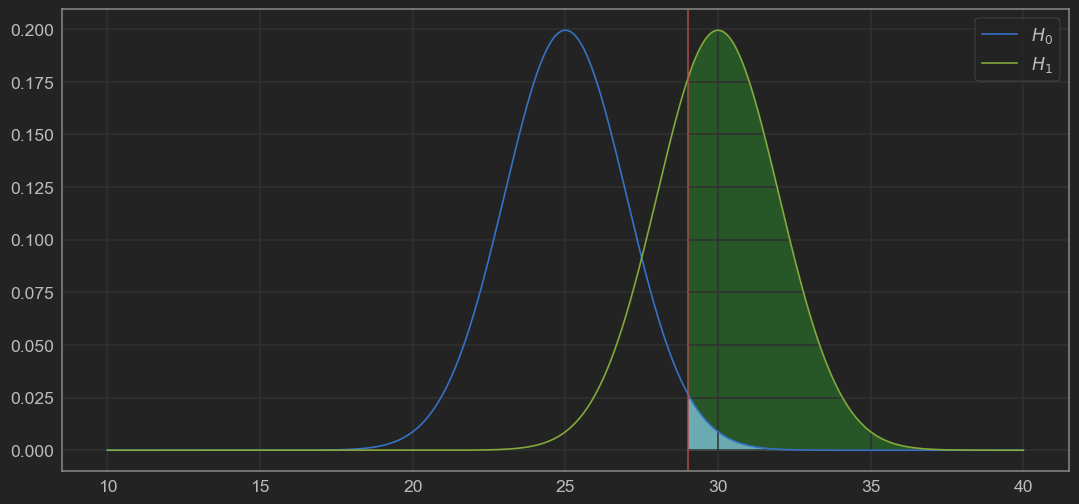

In [2]:
h0 = stats.norm(25, 2)
h1 = stats.norm(30, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.plot(x, h1.pdf(x), label = '$H_1$')
ax.axvline(29, color = 'r', alpha = 0.5)


ax.axvline(29, color = 'r', alpha = 0.5)
ax.fill_between(x, h1.pdf(x), where=((x >= 29)), color = 'limegreen', alpha = 0.3)
ax.fill_between(x, h0.pdf(x), where=((x >= 29)), color = 'skyblue', alpha = 0.7)
ax.legend();

In [40]:
1 - h0.cdf(29), 1 - h1.cdf(29)

(0.02275013194817921, 0.6914624612740131)

In [28]:
(x == 3) & (x < 34);

[Regresar al contenido](#Contenido)

# P-valor

- ¿Qué posibilidades hay de que ocurra el valor de $H_1$ si $H_0$ es verdadero?

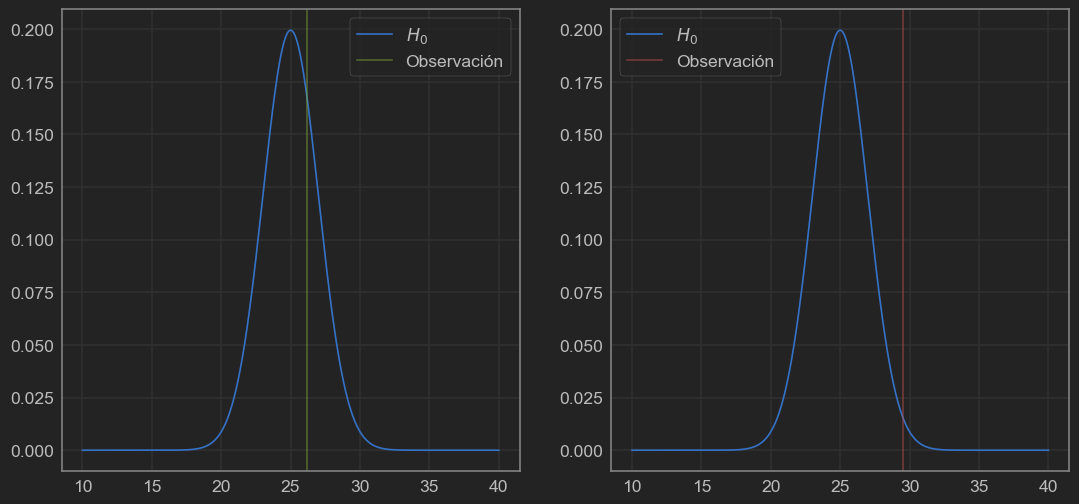

In [45]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].axvline(26.2, color = 'g', alpha = 0.5, label = 'Observación')
ax[0].legend()


ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax[1].legend();

Concepto importante:

- No podemos probar que $ H_1 $ sea cierto. Solo podemos calcular la probabilidad de que se pueda observar el estadístico de prueba asociado con $ H_1 $ dado que no hay un efecto verdadero.


Los valores p son probabilidades. Van de 0 a 1.

- Los valores más cercanos a 0 indican una baja probabilidad de $ H_1 | H_0 $
- Los valores más cercanos a 1 indican una alta probabilidad de $ H_1 | H_0 $


Un hallazgo se denomina `estadísticamente significativo` si el estadístico de prueba es mayor que un umbral.

Eso es si $p(H_1) < p(\alpha)$
El umbral es arbitrario, los valores comunes son $p = 0.5$ o $p = 0.01$

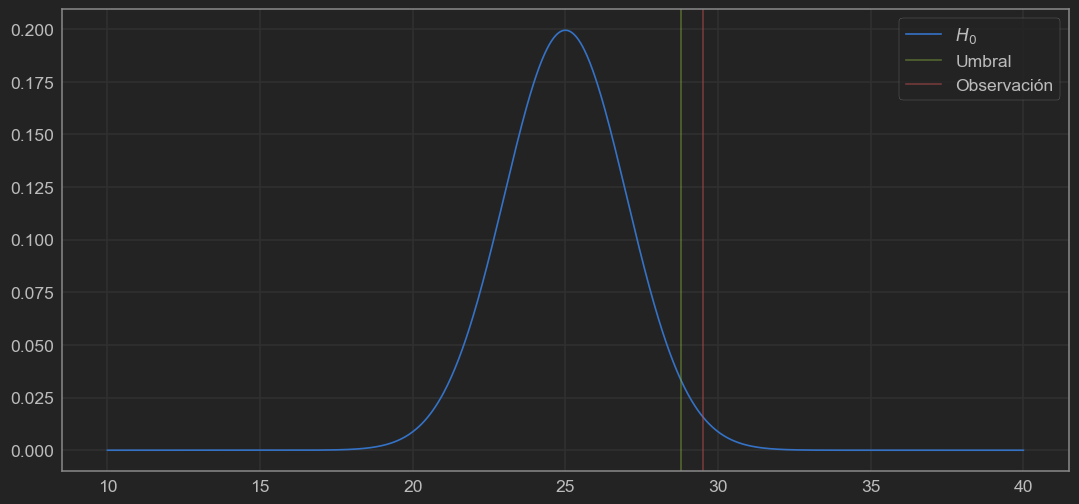

In [51]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(28.8, color = 'g', alpha = 0.5, label = 'Umbral')
ax.axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax.legend();

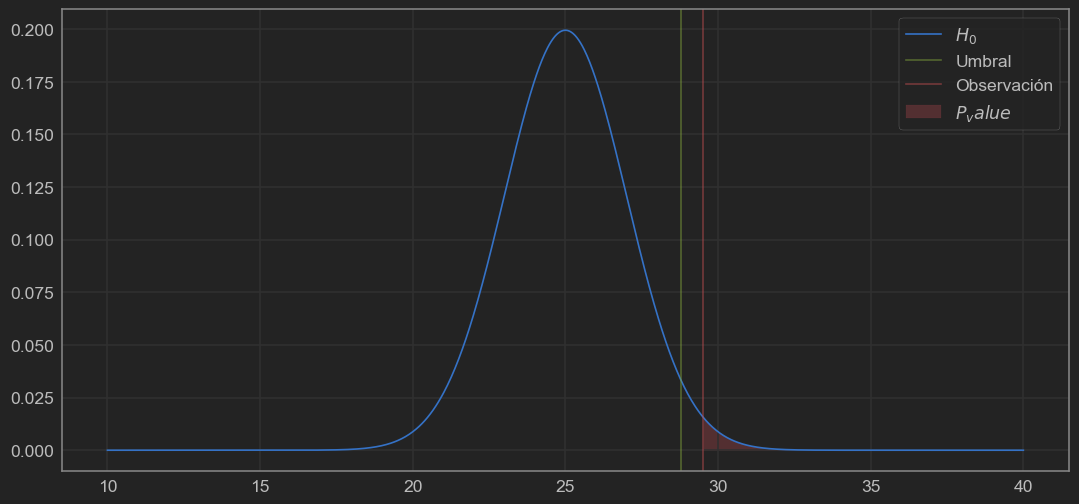

In [53]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(28.8, color = 'g', alpha = 0.5, label = 'Umbral')
ax.axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax.fill_between(x, h0.pdf(x), where = (x >= 29.5), color = 'r', alpha = 0.3, label = '$P_value$')
ax.legend();

Cada lado de la distribución $H_0$ es poco probable.

El umbral del valor p se refiere a toda el área de significancia.

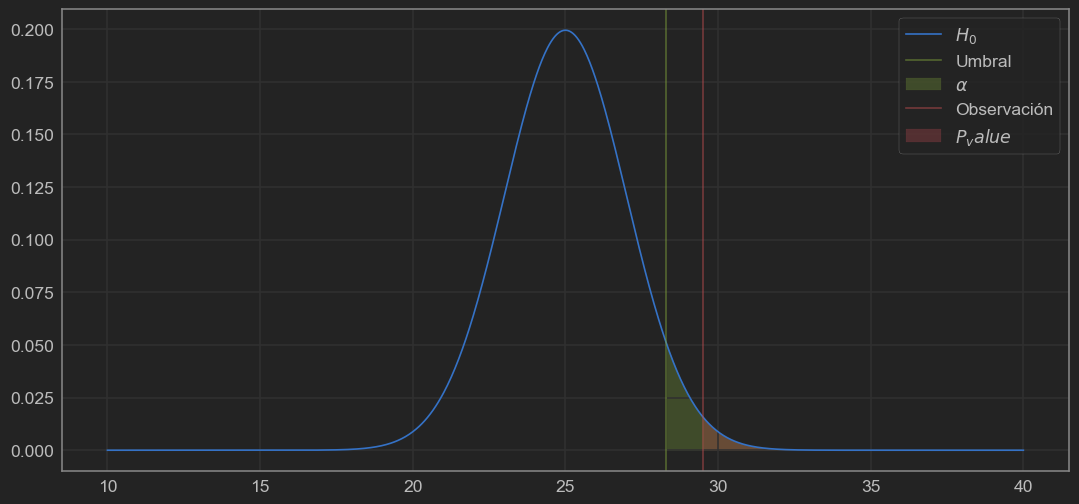

In [60]:
h0 = stats.norm(25, 2)



x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, h0.pdf(x), label = '$H_0$')
ax.axvline(h0.ppf(0.95), color = 'g', alpha = 0.5, label = 'Umbral')
ax.fill_between(x, h0.pdf(x), where = (x >= h0.ppf(0.95)), color = 'g', alpha = 0.3, label = '$\\alpha$')
ax.axvline(29.5, color = 'r', alpha = 0.5, label = 'Observación')
ax.fill_between(x, h0.pdf(x), where = (x >= 29.5), color = 'r', alpha = 0.3, label = '$P_value$')
ax.legend();

In [61]:
1 - h0.cdf(h0.ppf(0.95))

0.050000000000000155

In [58]:
h0.ppf(0.95)

28.289707253902943

Una cosa importante que hay que tener en cuenta es que si nosotros no establecemos un nivel de significancia $\alpha$ entonces:

- Aceptamos $H_0$ si el p-valor es "grande" ($\geq 0.1$)
- Rechazamos $H_0$ si el p-valor es "pequeño" ($\leq 0.05$)
    - El p-valor es _significativo_ si es $ < 0.05$
    - El p-valor es _fuertemente significativo_ si es $ < 0.01$
    - El p-valor es _Muy significativo_ si es $ < 0.001$
    
    
Pero si el p-valor esta entre 0.05 y 0.1, entonces se requerirán estudios posteriores, es lo que se denomina la _zona crepuscular_ o _twilinght zone_. Es decir no podemos concluir si podemos rechazar o no $H_0$.

[Regresar al contenido](#Contenido)




### Tipos de Hipótesis Alternativas


Al momento de realizar una prueba de hipótesis lo vamos a representar de la siguiente manera:

$$
\left\{
\begin{array}{ll}
H_0 & \text{Hipótesis nula}\\
H_1 & \text{Hipótesis alternativa}\\
\end{array}
\right.
$$

Hay que generar una regla de decisión para poder rechazar o no la hipótesis nula partir de la información que contenga la muestra. Tengan en cuenta que es imposible encontrar evidencias de que un parámetro $\mu$ sea igual a cierto valor $\mu_0$, pero si podemos encontrar evidencia de que $\mu < \mu_0$, $\mu > \mu_0$ o $\mu \neq \mu_0$, sabiendo esto la hipótesis alternativa y nula se caracterizaran por lo siguiente:


$$
\left\{
\begin{array}{llll}
H_0: & = & \leq & \geq\\
H_1: & < & > & \neq\\
\end{array}
\right.
$$

por ejemplo si queremos decidir si la media es más pequeña que 2 o no.

$$
\left\{
\begin{array}{ll}
H_0: & \mu = 2\\
H_1: & \mu < 2\\
\end{array}
\right.
$$

si queremos decidir si la media es igual o diferente de 5:


$$
\left\{
\begin{array}{ll}
H_0: & \mu = 5\\
H_1: & \mu \neq 5\\
\end{array}
\right.
$$


Esto nos provoca que haya dos tipos de pruebas, las pruebas unilaterales: Donde $H_1: \mu < \mu_0$ o $H_1: \mu > \mu_0$, o las pruebas bilaterales: $H_1: \mu \neq \mu_0$. El test toma el nombre de las hipótesis alternativas.

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu < \mu_0\\
\end{array}
\right.
$$

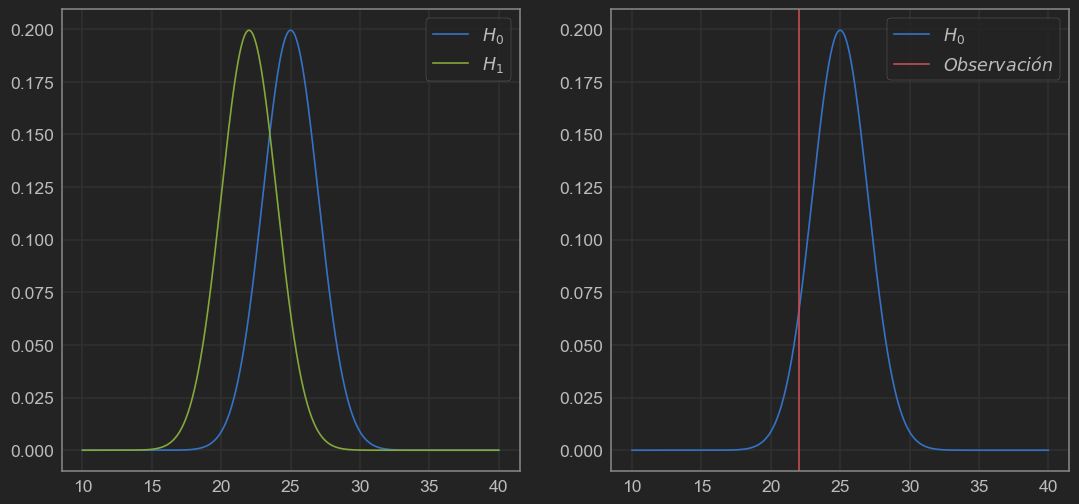

In [65]:
h0 = stats.norm(25, 2)
h1 = stats.norm(22, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].plot(x, h1.pdf(x), label = '$H_1$')
ax[0].legend()

ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(h1.mean(), label = '$Observación$', color = 'r')
ax[1].legend();

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu > \mu_0\\
\end{array}
\right.
$$

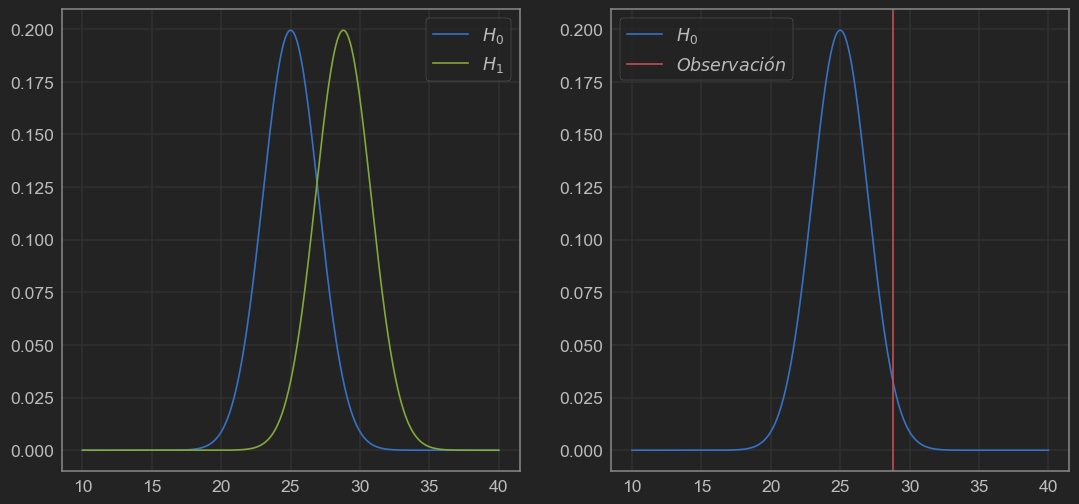

In [66]:
h0 = stats.norm(25, 2)
h1 = stats.norm(28.8, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].plot(x, h1.pdf(x), label = '$H_1$')
ax[0].legend()

ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(h1.mean(), label = '$Observación$', color = 'r')
ax[1].legend();

$$
\left\{
\begin{array}{ll}
H_0: & \mu = \mu_0\\
H_1: & \mu \ne \mu_0\\
\end{array}
\right.
$$

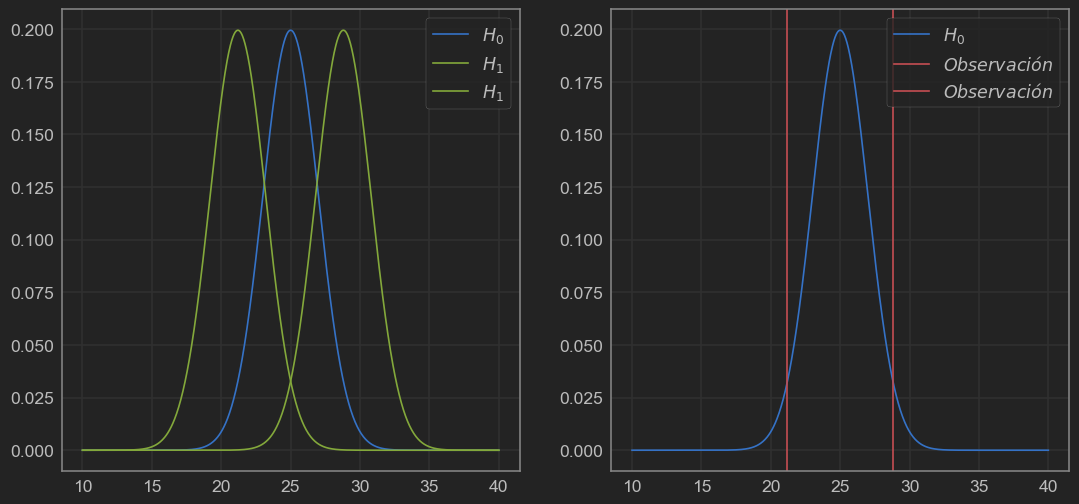

In [67]:
h0 = stats.norm(25, 2)
h1 = stats.norm(28.8, 2)
h2 = stats.norm(21.2, 2)


x = np.linspace(10, 40, 1000)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(x, h0.pdf(x), label = '$H_0$')
ax[0].plot(x, h1.pdf(x), label = '$H_1$', color = 'g')
ax[0].plot(x, h2.pdf(x), label = '$H_1$', color = 'g')
ax[0].legend()

ax[1].plot(x, h0.pdf(x), label = '$H_0$')
ax[1].axvline(h1.mean(), label = '$Observación$', color = 'r')
ax[1].axvline(h2.mean(), label = '$Observación$', color = 'r')
ax[1].legend();

[Regresar al contenido](#Contenido)

### Tipos de Errores


Dado que podemos tomar una decisión con base a la muestra que estamos trabajando, y equivocarnos una prueba de hipótesis puede tener uno de los siguientes cuatro resultados:




|Decisión/Realidad|$H_0$ es verdadera|$H_0$ es falsa|
|:---------------:|:----------------:|:------------:|
|Fracasar en rechazar $H_0$|Decisión correcta de tipo A|Error de tipo II|
|rechazar $H_0$|Error de tipo I|Decisión correcta de tipo B|



<img src = 'https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg'  > 


La decisión correcta de tipo A y B son _fracasar en rechazar $H_0$ cuando $H_0$ es verdadera_ y _rechazar $H_0$ cuando $H_0$ es falsa_. Ahora, no siempre se puede tomar la decisión correcta, por lo que existen los errores de tipo I y II, el error de tipo I es un _falso positivo_ (recordemos que el objetivo del investigador es rechazar $H_0$), es decir, este error se comete cuando e rechaza $H_0$ siendo esta verdadera, el error de tipo I tiene asociado una probabilidad de que ocurra que denotamos $\alpha$ y es denominada significancia de la prueba. Por su parte el error de tipo II es un _falso negativo_ y ocurre cuando no se rechaza $H_0$ siendo esta falsa, la probabilidad de que cometamos un error de tipo II la denotamos por $\beta$.

Para encontrar estos errores se asigna una pequeña probabilidad a cada una de ellas, las probabilidades más comúnmente usadas para $\alpha$ y $\beta$ son 0.01 y 0.05. Por su lado las dos decisiones correctas tienen también sus propias probabilidades, para la decisión correcta de tipo A la probabilidad es $1-\alpha$ y para la decisión correcta de tipo B es $1 - \beta$. A la probabilidad $1 - \beta$ se le llamada _potencia de la prueba_ porque es la medida de la capacidad de la prueba de rechazar una hipótesis nula falsa.

$$P(\text{Error tipo I}) = P(\text{Rechazar} H_0|H_0 \text{es cierta}) = \alpha$$

$$P(\text{Error tipo II}) = P(\text{Aceptar} H_0|H_0 \text{es falsa}) = \beta$$

In [3]:
from ipywidgets import interact 

In [30]:
def error_plot(alpha, h1_mean):
    
    h0 = stats.norm()
    h1 = stats.norm(h1_mean, 1)
    x = np.linspace(-10, 10, 1000)
    
    
    fig, ax = plt.subplots(2, 2, figsize = (8, 8))
    
    ax[0, 0].plot(x, h0.pdf(x), label = '$H_0$')
    ax[0, 0].plot(x, h1.pdf(x), label = '$H_1$')
    if h1_mean < 0:
        ax[0, 0].axvline(h0.ppf(alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    else:
        ax[0, 0].axvline(h0.ppf(1 - alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    
    if h1_mean < 0:
        ax[0, 0].fill_between(x, h0.pdf(x), where = (x >= h0.ppf(alpha)), alpha = 0.5,
                              color = 'skyblue')
    else:
        ax[0, 0].fill_between(x, h0.pdf(x), where = (x <= h0.ppf(1 - alpha)), alpha = 0.5,
                              color = 'skyblue')
        
    ax[0, 0].set_title('Verdadero Negativo')
        
        
    ax[1, 0].plot(x, h0.pdf(x), label = '$H_0$')
    ax[1, 0].plot(x, h1.pdf(x), label = '$H_1$')
    if h1_mean < 0:
        ax[1, 0].axvline(h0.ppf(alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    else:
        ax[1, 0].axvline(h0.ppf(1 - alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    
    if h1_mean < 0:
        ax[1, 0].fill_between(x, h0.pdf(x), where = (x <= h0.ppf(alpha)), alpha = 0.5,
                              color = 'red')
    else:
        ax[1, 0].fill_between(x, h0.pdf(x), where = (x >= h0.ppf(1 - alpha)), alpha = 0.5,
                              color = 'red')
        
    ax[1, 0].set_title('Falso Positivo')
    
    
    ax[0, 1].plot(x, h0.pdf(x), label = '$H_0$')
    ax[0, 1].plot(x, h1.pdf(x), label = '$H_1$')
    if h1_mean < 0:
        ax[0, 1].axvline(h0.ppf(alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    else:
        ax[0, 1].axvline(h0.ppf(1 - alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    
    if h1_mean < 0:
        ax[0, 1].fill_between(x, h1.pdf(x), where = (x >= h0.ppf(alpha)), alpha = 0.5,
                              color = 'red')
    else:
        ax[0, 1].fill_between(x, h1.pdf(x), where = (x <= h0.ppf(1 - alpha)), alpha = 0.5,
                              color = 'red')
        
    ax[0, 1].set_title('Falso Negativo')
    
    
    ax[1, 1].plot(x, h0.pdf(x), label = '$H_0$')
    ax[1, 1].plot(x, h1.pdf(x), label = '$H_1$')
    if h1_mean < 0:
        ax[1, 1].axvline(h0.ppf(alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    else:
        ax[1, 1].axvline(h0.ppf(1 - alpha), label = "Significancia ($\alpha$))", color = 'r', alpha = 0.7)
    
    if h1_mean < 0:
        ax[1, 1].fill_between(x, h1.pdf(x), where = (x <= h0.ppf(alpha)), alpha = 0.5,
                              color = 'b')
    else:
        ax[1, 1].fill_between(x, h1.pdf(x), where = (x >= h0.ppf(1 - alpha)), alpha = 0.5,
                              color = 'b')
        
    ax[1, 1].set_title('Verdadero Positivo');

In [31]:
interact(error_plot, alpha = (0.01, 0.5, 0.01), h1_mean = (-3, 7, 0.1))

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, min=0.01, step=0.01), FloatSlider(…

<function __main__.error_plot(alpha, h1_mean)>

[Regresar al contenido](#Contenido)

# Prueba paramétrica vs no paramétrica

Qué no significa `no paramétrico`:

**Sin parámetros en absoluto **

Significado correcto:

- Estadísticas que no se basan en supuestos sobre la distribución subyacente.
- Métodos de inferencia estadística que generan la distribución $H_0$ a partir de los datos, no de una ecuación.

| Prueba paramétrica | Prueba no paramétrica |
|: -------------: |: -----------------: |
| T-test de 1 muestra | Prueba de rangos singulares de Wilcoxon |
| T-test t de 2 muestras | Prueba U de Mann-Whitney |
| Correlación de Pearson | Correlación de Sperman |



** Ventajas y limitaciones **

| Prueba paramétrica | Prueba no paramétrica |
|: -------------: |: -----------------: |
| Estándar, ampliamente utilizado | Algunos no son estándar |
| Basado en supuestos | No basado en supuestos |
| Las suposiciones deben probarse | Puede ser lento |
| Puede ser incorrecto cuando se violan las suposiciones | Apropiado para datos no numéricos |
| Computacionalmente rápido | Apropiado para tamaños de muestra pequeños |
| - | Algunos métodos dan resultados diferentes cada vez |

**Conclusión**

Utilice métodos paramétricos cuando sea posible, y utilice métodos no paramétricos cuando sea necesario.

[Regresar al contenido](#Contenido)

# Correlación

En el sentido más amplio, la correlación es cualquier asociación estadística, aunque comúnmente se refiere al grado en que un par de variables están relacionadas linealmente.

- Un análisis de correlación calcula un coeficiente de correlación.

- el coeficiente de correlación es un número único que muestra la relación entre dos variables.

- El coeficiente de correlación varía entre -1 y 1.

    - -1 significa una relación inversa perfecta.
    - 0 significa que no hay relación
    - 1 significa una relación positiva perfecta.

- El coeficiente de correlación en sí mismo es una medida continua de la fuerza de la correlación. Se debe calcular un valor p correspondiente para interpretar su significación estadística.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg'>



## Correlación vs causalidad

- La correlación simplemente muestra una relación.
- No revela ni implica causalidad.
- La causalidad puede demostrarse mediante manipulaciones experimentales.

**Ejemplo**

- Helado → Ataques de tiburones

[Regresar al contenido](#Contenido)


## Covarianza y correlación: fórmulas

¿Cuál es la diferencia entre covarianza y correlación ?:

- La covarianza es un número único que mide la relación lineal entre dos variables.
- La covarianza está en la misma escala que los datos originales.
- La correlación es la covarianza escalada.
- Es independiente de la escala de datos.

**Covarianza**

$$cov[X, Y] = \frac{1}{n - 1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$


**Correlación**

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$


**P-valor**

$$t_{n-2} = \frac{r \sqrt{n - 2}}{1 - r^2}$$

- La significancia estadística se calcula a partir de un valor t que se basa en la fuerza de la correlación y el número de puntos de datos.

In [32]:
import pandas as pd

In [33]:
lol = pd.read_csv('high_diamond_ranked_10min.csv')

In [34]:
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [35]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

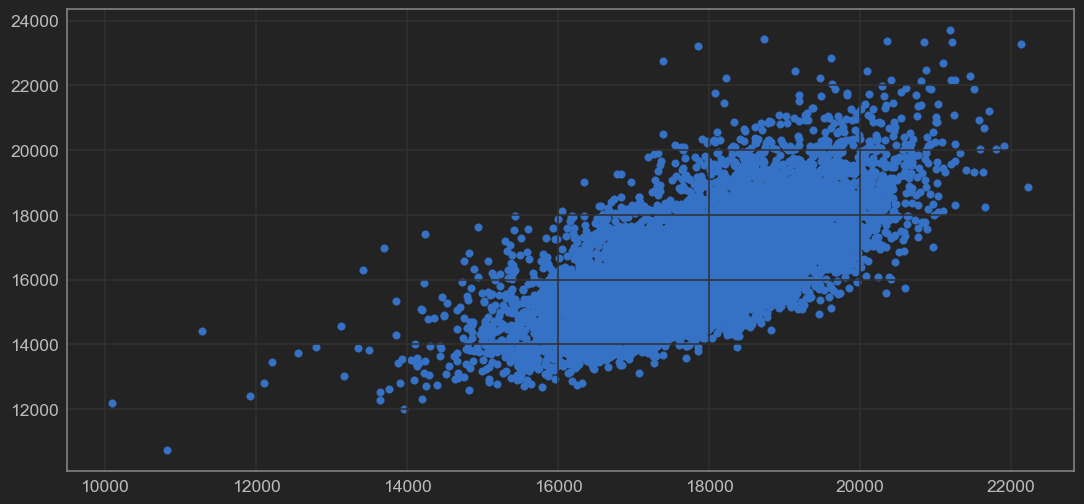

In [38]:
fig, ax = plt.subplots(figsize = (13, 6))

ax.scatter(lol['blueTotalExperience'], lol['blueTotalGold']);

In [42]:
lol.corr().loc['blueTotalExperience', 'blueTotalGold']

0.6761933385637149

In [44]:
p = stats.pearsonr(lol['blueTotalExperience'], lol['blueTotalGold'])

In [54]:
p[1]

0.0

In [46]:
corr_mat = lol.corr()

In [48]:
p_value_m = corr_mat.copy()

In [50]:
p_value_m;

In [52]:
p_value_m.index

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [55]:
for r in p_value_m.index:
    for c in p_value_m.columns:
        p_value_m.loc[r, c] = stats.pearsonr(lol[r], lol[c])[1]

In [56]:
p_value_m

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,0.000000,9.220096e-01,5.941780e-01,2.308131e-01,2.499133e-01,1.059036e-04,1.909199e-01,2.040709e-02,9.899351e-02,3.730915e-01,...,7.236811e-01,2.911237e-01,2.170970e-01,3.522064e-02,6.110367e-01,5.483047e-01,1.448340e-01,2.209832e-01,6.110367e-01,2.911237e-01
blueWins,0.922010,0.000000e+00,9.931054e-01,1.085368e-05,2.861072e-91,1.726345e-261,1.139421e-264,4.420731e-173,1.649331e-110,1.800277e-102,...,4.987014e-25,0.000000e+00,2.695530e-286,0.000000e+00,6.110528e-101,1.858667e-28,0.000000e+00,0.000000e+00,6.110528e-101,0.000000e+00
blueWardsPlaced,0.594178,9.931054e-01,0.000000e+00,6.161563e-04,7.483409e-01,7.142618e-02,7.951733e-01,9.600270e-04,4.803705e-02,7.894994e-02,...,4.137156e-01,5.720562e-01,3.773675e-01,1.963584e-01,2.180030e-01,9.031999e-01,1.163472e-01,5.477336e-03,2.180030e-01,5.720562e-01
blueWardsDestroyed,0.230813,1.085368e-05,6.161563e-04,0.000000e+00,7.826819e-02,7.940548e-04,3.272432e-13,1.529214e-11,3.383049e-05,5.649500e-05,...,1.732186e-02,1.911760e-11,4.163590e-09,1.193737e-08,6.919008e-05,3.819819e-04,5.202133e-15,8.616509e-15,6.919008e-05,1.911760e-11
blueFirstBlood,0.249913,2.861072e-91,7.483409e-01,7.826819e-02,0.000000e+00,7.007898e-164,2.802474e-138,3.232658e-118,7.117919e-52,5.394379e-41,...,4.400292e-12,1.131824e-206,8.103195e-75,3.450162e-85,2.390832e-55,1.464317e-02,0.000000e+00,3.599090e-130,2.390832e-55,1.131824e-206
blueKills,0.000106,1.726345e-261,7.142618e-02,7.940548e-04,7.007898e-164,0.000000e+00,6.877764e-01,0.000000e+00,1.481409e-71,2.795559e-65,...,2.175579e-16,1.895871e-58,0.000000e+00,0.000000e+00,0.000000e+00,3.917402e-103,0.000000e+00,0.000000e+00,0.000000e+00,1.895871e-58
blueDeaths,0.190920,1.139421e-264,7.951733e-01,3.272432e-13,2.802474e-138,6.877764e-01,0.000000e+00,8.759752e-03,5.330644e-94,5.459555e-80,...,2.140123e-55,0.000000e+00,0.000000e+00,0.000000e+00,5.610123e-05,1.682938e-23,0.000000e+00,0.000000e+00,5.610123e-05,0.000000e+00
blueAssists,0.020407,4.420731e-173,9.600270e-04,1.529214e-11,3.232658e-118,0.000000e+00,8.759752e-03,0.000000e+00,3.537971e-50,1.307449e-65,...,1.395949e-09,8.798828e-41,1.184405e-294,0.000000e+00,9.562986e-262,2.686726e-58,0.000000e+00,0.000000e+00,9.562986e-262,8.798828e-41
blueEliteMonsters,0.098994,1.649331e-110,4.803705e-02,3.383049e-05,7.117919e-52,1.481409e-71,5.330644e-94,3.537971e-50,0.000000e+00,0.000000e+00,...,2.288594e-07,3.112991e-105,1.096217e-64,8.369031e-81,9.487574e-14,2.099798e-18,2.713706e-179,3.527809e-157,9.487574e-14,3.112991e-105
blueDragons,0.373092,1.800277e-102,7.894994e-02,5.649500e-05,5.394379e-41,2.795559e-65,5.459555e-80,1.307449e-65,0.000000e+00,0.000000e+00,...,1.086670e-03,2.054077e-83,1.113173e-50,2.762595e-57,2.704868e-09,1.045670e-22,7.788640e-123,2.693553e-100,2.704868e-09,2.054077e-83


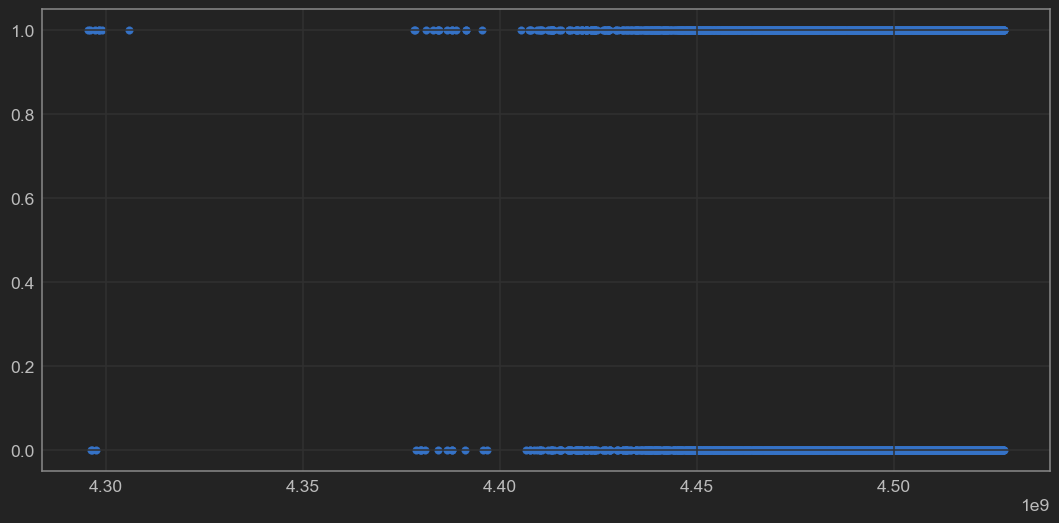

In [57]:
fig, ax = plt.subplots(figsize = (13, 6))

ax.scatter(lol['gameId'], lol['blueWins']);

In [58]:
stats.pearsonr(lol['gameId'], lol['blueWins'])

PearsonRResult(statistic=0.0009851278627279378, pvalue=0.9220096324137227)

In [59]:
import seaborn as sns

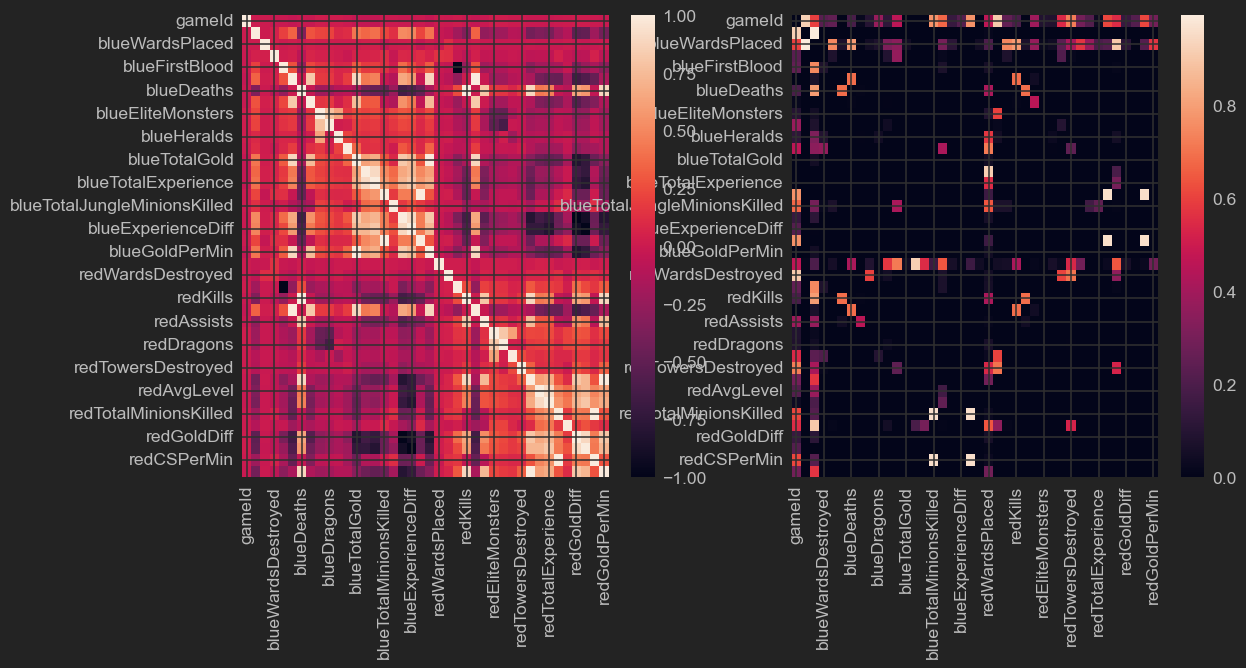

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

sns.heatmap(corr_mat, ax = ax[0])
sns.heatmap(p_value_m, ax = ax[1]);

[Regresar al contenido](#Contenido)


## El problema con Pearson

<img src = 'https://www.researchgate.net/profile/Andrew-Heathcote/publication/280302159/figure/fig2/AS:614021682171910@1523405585885/Anscombes-quartet-highlights-the-importance-of-plotting-data-to-confirm-the-validity-of.png'>


- La correlación de Pearson puede representar de forma excesiva o insuficiente las relaciones si contienen no linealidades o valores atípicos.

- Pearson es apropiado para datos distribuidos normalmente.



### Correlación de Spearman

Este es el método dominante para las correlaciones no paramétricas y es una alternativa para la correlación de Pearson.

- Pearson y Spearman convergen cuando los datos se distribuyen normalmente.


La $\rho$ de Spearman busca una una relación monótona, independientemente de si la relación es lineal o no lineal.


- Para calcular $\rho$, los datos son ordenados y reemplazados por su respectivo orden.

    - $ [3321654, -40, 1, 0] a [4, 1, 3, 2] $
    
- Calcular el coeficiente de correlación de Pearson en rangos.

- Mismo valor p para Pearson.

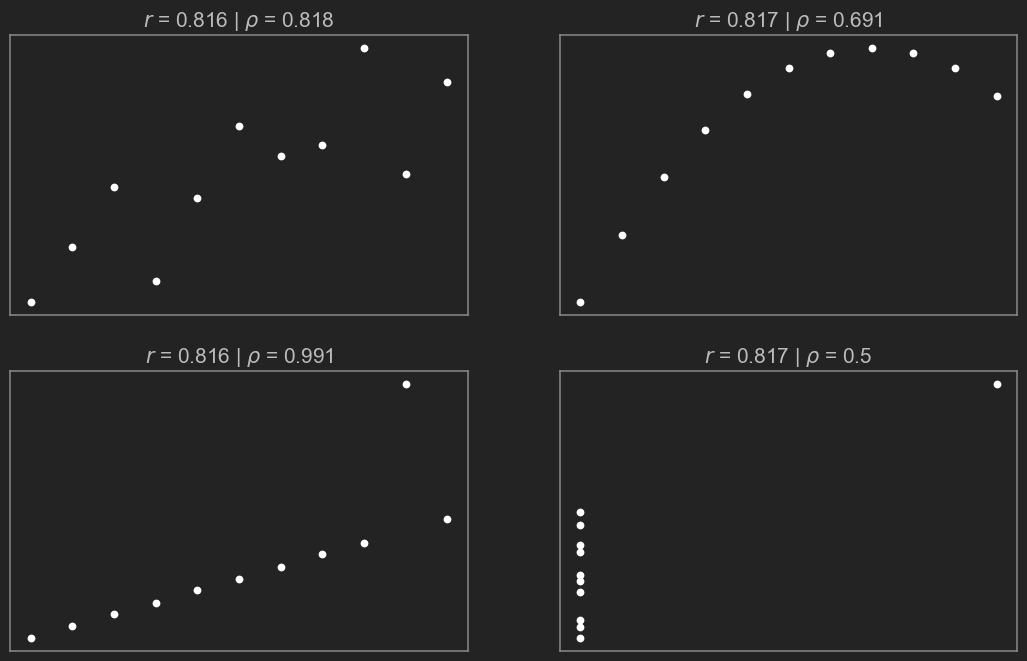

In [64]:
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])


# plot and compute correlations
fig, ax = plt.subplots(2, 2, figsize =(13, 8))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1], color = 'w', marker = 'o',
              linestyle = '')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1])[0]
    corr_s = stats.spearmanr(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1])[0]
    ax[i].set_title('$r$ = {} | $\\rho$ = {}'.format(np.round(corr_p, 3),
                                                     np.round(corr_s, 3)),
                    fontsize = 15)



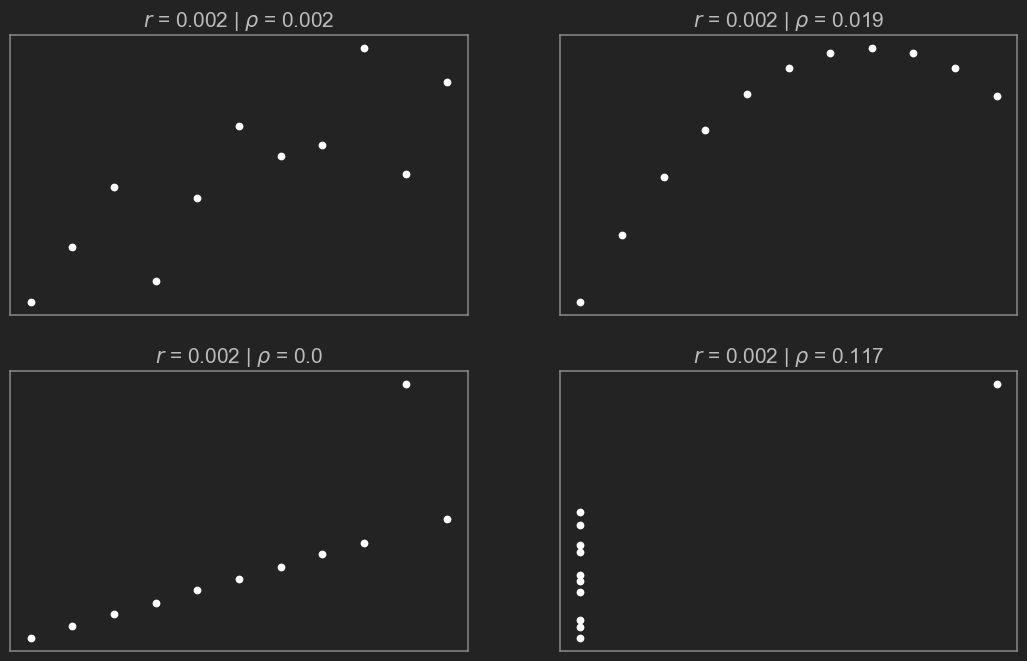

In [65]:
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])


# plot and compute correlations
fig, ax = plt.subplots(2, 2, figsize =(13, 8))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1], color = 'w', marker = 'o',
              linestyle = '')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1])[1]
    corr_s = stats.spearmanr(anscombe[:, 2 * i],anscombe[:, (2 * i) + 1])[1]
    ax[i].set_title('$r$ = {} | $\\rho$ = {}'.format(np.round(corr_p, 3),
                                                     np.round(corr_s, 3)),
                    fontsize = 15)



[Regresar al contenido](#Contenido)


# T-test

## Propósito e interpretación de la prueba t

La prueba T es una de las estadísticas más importantes y más utilizadas. La idea principal de la prueba t es comparar los valores (normalmente la media) entre dos grupos.

$$
\left\{
\begin{matrix}
H_0 & \mu_1 = \mu_2\\
H_1 & \mu_1 \ne \mu_2\\
\end{matrix}
\right.
$$

La fórmula general del t-test es la siguiente:

$$t_k = \frac{\bar{x} - \bar{y}}{\frac{s}{\sqrt{n}}}$$

In [68]:
def student_vs_gauss(n):
    
    gauss   = stats.norm()
    student = stats.t(n)
    
    x = np.linspace(-3, 3, 1000)
    
    fig, ax = plt.subplots(figsize = (13, 6))
    
    ax.plot(x, gauss.pdf(x), color = 'b', label = "Distribución Normal")
    ax.plot(x, student.pdf(x), color = 'r', label = "Distribución t de Student n = {}".format(n))
    ax.set_title("Gauss vs Student")
    ax.legend()

In [69]:
interact(student_vs_gauss, n = (1, 40, 1))

interactive(children=(IntSlider(value=20, description='n', max=40, min=1), Output()), _dom_classes=('widget-in…

<function __main__.student_vs_gauss(n)>

[Regresar al contenido](#Contenido)

## T-test de una muestra

Pruebe si se pudo haber extraído un conjunto de números de una distribución con una media especificada.


- Probar si el coeficiente intelectual de un grupo de estudiantes es significativamente diferente de 100.

$$t_{n - 1} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$


- $\bar{x}$ → media muestral
- $\mu$ → valor de $H_0$ 
- $s$ → desviasión estandar muestral
- $n$ → Número de puntos
- $n - 1$ → grados de libertad

### T-test de una muestra: supuestos

1. Los datos son numéricos (no categóricos).
2. Los datos son independientes entre sí.
3. Los datos se extraen aleatoriamente de la población a la que se debe hacer una generalización.
4. La media y la desviación estándar son medidas válidas de tendencia central y dispersión.

In [70]:
drug_data = pd.read_csv('Islander_data.csv')

In [71]:
drug_data.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [73]:
drug_data['Drug'].unique()

array(['A', 'S', 'T'], dtype=object)

In [74]:
drug_data['Dosage'].unique()

array([1, 2, 3], dtype=int64)

In [75]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [108]:
mask1 = drug_data['Drug'] == 'A'
mask2 = drug_data['Dosage'] == 3
mask3 = drug_data['Happy_Sad_group'] == 'S'
g1 = drug_data[mask1 & mask2 & mask3]
g1

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
46,Felipe,Carrasco,51,S,3,A,55.2,74.3,19.1
49,Riko,Carrasco,52,S,3,A,28.3,44.0,15.7
50,Benjamin,Durand,47,S,3,A,41.9,55.6,13.7
53,Kevin,Durand,32,S,3,A,71.7,90.0,18.3
54,Takahiro,Durand,53,S,3,A,54.8,88.2,33.4
56,Megan,Kennedy,27,S,3,A,81.0,120.0,39.0
57,Akane,Lopez,49,S,3,A,46.7,59.7,13.0
60,Laura,McCarthy,34,S,3,A,57.3,96.0,38.7
62,Ariane,Steiner,27,S,3,A,54.0,60.0,6.0
64,Jade,Summers,40,S,3,A,59.8,79.7,19.9


<Axes: >

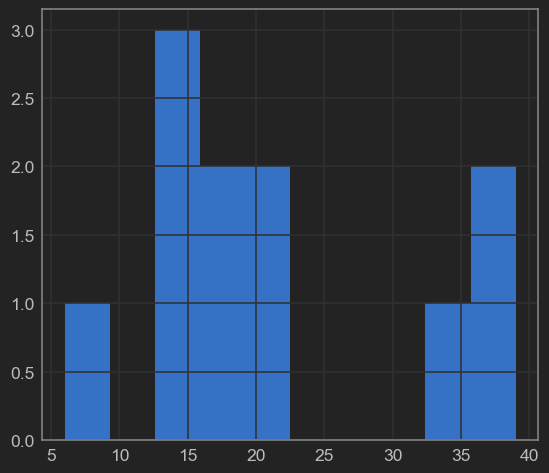

In [104]:
drug_data[mask1 & mask2 & mask3]['Diff'].hist()

$$
\left\{
\begin{matrix}
H_0 & \mu = 0\\
H_1 & \mu \ne 0\\
\end{matrix}
\right.
$$

In [109]:
g1['Diff'].mean()

21.700000000000003

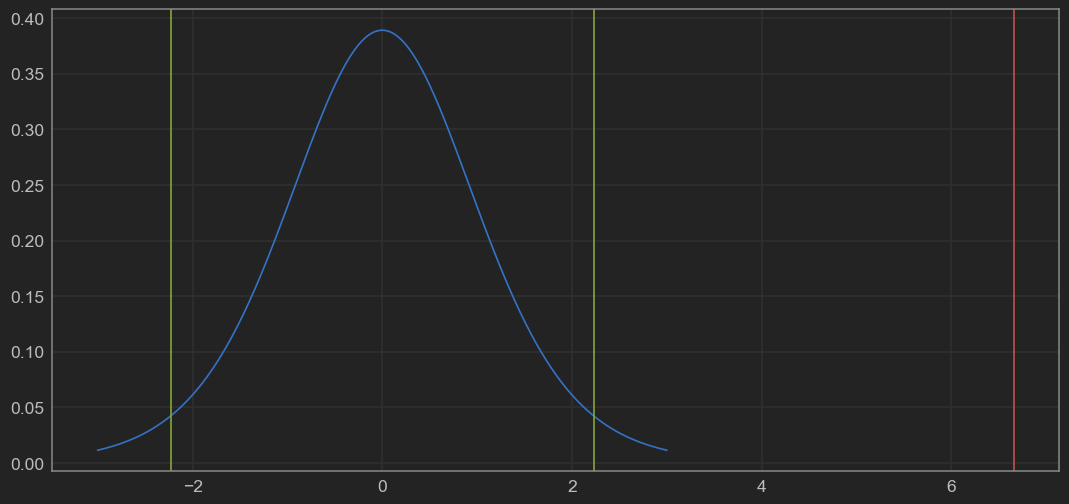

In [110]:
mu = 0
alpha = 0.05

t = (g1['Diff'].mean() - mu) / (g1['Diff'].std() / np.sqrt(g1.shape[0]))
df = g1.shape[0] - 1

dist = stats.t(df)
p = 1 - dist.cdf(t)

fig, ax = plt.subplots(figsize = (13, 6))
x = np.linspace(-3, 3, 1000)


ax.plot(x, dist.pdf(x))
ax.axvline(t, color = 'r')
ax.axvline(dist.ppf(alpha / 2), color = 'g')
ax.axvline(dist.ppf(1 - alpha / 2), color = 'g');

In [112]:
p * 2

5.662089088831479e-05

In [113]:
stats.ttest_1samp(g1['Diff'], 0)

TtestResult(statistic=6.656658098740379, pvalue=5.6620890888245564e-05, df=10)

In [111]:
stats.tt

6.656658098740379

$$t_{n - 1} = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

[Regresar al contenido](#Contenido)

# T-test de dos muestras

Pruebe si se podrían haber extraído dos conjuntos de números de la misma distribución.


**Ejemplo**

- Pruebe si los niveles de estrés autoinformados cambian después de 6 semanas de 'distanciamiento social'.

(Declaraciones formales: Estime la probabilidad de que los niveles de estrés autoinformados antes y después de 6 semanas de distanciamiento social se extraigan de la misma distribución).

Hay varias fórmulas de prueba t de dos muestras. El numerador es siempre el mismo, pero el denominador depende de si los grupos están emparejados o no emparejados, tienen una varianza igual o desigual y tienen tamaños de muestra emparejados o diferentes.

- Emparejado o no emparejado: si los dos grupos de datos provienen del mismo o de diferentes individuos.

    - Emparejado: Los mismos individuos autoinforman sus niveles de estrés antes y después del distanciamiento social.
    - No emparejado: cambio en el estrés relacionado con el distanciamiento social en Dinamarca frente a Singapur.

- Varianza igual o desigual: si los dos grupos tienen (aproximadamente) la misma varianza.

    - Igualdad de varianza: los grupos 'A' y 'B' son estudiantes caucásicos de 20 años de la misma universidad; El grupo 'A' estudia ingeniería y el grupo 'B' estudia informática.
    - Varianza desigual: el grupo 'A' son estudiantes caucásicos de 20 años de la misma universidad de ingeniería, el grupo 'B' es una muestra aleatoria de 20 años de todo el país.

- Tamaños de muestra iguales o desiguales: si los grupos tienen el mismo número de valores (se aplica solo a grupos no apareados).

$$t_{df} = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{(n_1 - 1)s_{1}^{2} + (n_2 - 1)s_{2}^{2}}{n_1 + n_2 - 2}} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$


- Comparar el tiempo medio de diferencia en los pacientes que recibieron placebo y la droga 'T'

$$
\left\{
\begin{matrix}
H_0 & \mu_1 = \mu_2\\
H_1 & \mu_1 \ne \mu_2\\
\end{matrix}
\right.
$$

[Regresar al contenido](#Contenido)

# Wilcoxon signed-rank (T-test no paramétrico)


Alternativa no paramétrica al T-test de una o dos muestras.

- Se utiliza principalmente cuando los datos no se ajustan al supuesto de normalidad.

- Pruebe las diferencias en las medianas en lugar de las diferencias en las medias (la mediana es insensible a los valores atípicos)


| Nombre de la prueba | Cuándo usar |
|: -------: |: ---------: |
| Wilcoxon signed-rank | Una muestra |
| Signed-rank | Dos muestras emparejadas |
| U-test de Mann-Whitney | Dos muestras independientes |
| U-test de Mann-Whitney-Wilcoxon | Dos muestras independientes |
| Wilcoxon rank-sum test | Dos muestras independientes |


1. Eliminar pares iguales (eliminar pares iguales de puntos de datos que igualen el valor $H_0$)
    - ¿Por qué? Los pares iguales no contribuyen a la prueba de ninguna manera.
2. Transforma a ranking las direrencias
    - $r = rank(|x - y|)$
    

3. Suma ranking donde $x > y$
    - $W = \sum (r \times (x > y))$
    
    
4. Convertir a z

$$Z = \frac{W - \frac{n(n + 1)}{4}}{\sqrt{\frac{n(n + 1)(2n + 1)}{24}}}$$



- $n$ Es el número de pares restantes.
- $Z$ esta normalmente distribuida bajo $H_0$ y se le puede obtener un p-valor.

[Regresar al contenido](#Contenido)

# Ejercicio

El siguiente DataFrame contiene información sobre una encuesta en la que la gente califica su felicidad en un puntaje del 1 al 10 en diferentes países.

- Con los datos proporcionados a continuación, ¿Se puede afirmar que hay una diferencia entre lo felices que son las personas en Europa Oriental y Latinoamérica?

[Regresar al contenido](#Contenido)